In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
iris = load_iris()
dir(df)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [32]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
df.drop(columns=['sepal length (cm)','sepal width (cm)'], inplace = True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [46]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df)
df['cluster'] = y_predicted
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


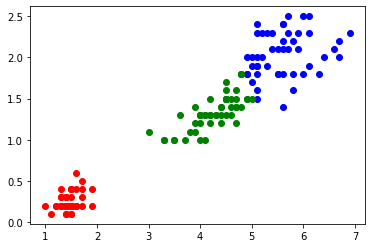

In [47]:
d0 = df[df['cluster']==0]
d1 = df[df['cluster']==1]
d2 = df[df['cluster']==2]

plt.scatter(d0['petal length (cm)'], d0['petal width (cm)'], color = 'red')
plt.scatter(d1['petal length (cm)'], d1['petal width (cm)'], color = 'blue')
plt.scatter(d2['petal length (cm)'], d2['petal width (cm)'], color = 'green')

In [48]:
r = range(1,10)
results = []

for i in r:
    ktest = KMeans(n_clusters = i)
    ktest.fit_predict(df)
    results.append(ktest.inertia_)
    
results

[652.8686666666666,
 112.32079999999999,
 31.371358974358976,
 22.642443630443633,
 14.193126322751322,
 11.41219696969697,
 9.283556709956711,
 7.790630075187972,
 6.877201557369359]

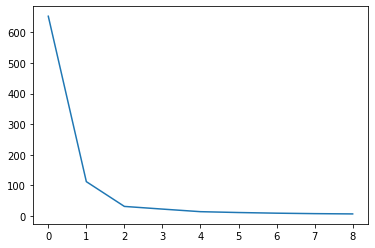

In [49]:
plt.plot(results)